<a href="https://colab.research.google.com/github/caavila96/gesproy23/blob/main/Analisis_Gesproy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de la base de datos de Gestión de Proyectos del Sistema General de Regalias - Gesproy**

**Autor:** Camilo Andrés Avila Carreño

El GESPROY es un aplicativo o plataforma tecnológica dispuesta para el reporte y seguimiento de información de los proyectos ejecutados con recursos del SGR. El ente ejecutor se encarga de reportar la información correspondiente a programación, contratación y ejecución de las actividades de los proyectos.

Esta base de datos contiene la totalidad de proyectos aprobados desde el 1 de enero de 2012 hasta la fecha del último corte, con la información actualizada a este último corte, así como, Contiene el desglose fuentes de financiación actual de los proyectos incluyendo los resultantes del proceso de homologación de fuentes.

**Objetivo del análisis:** Analizar las caracteristicas de los proyectos de inversión con dinero de regalias que tienen retrasos en su ejecución ya sea en proyectos que actualmente están activos como en proyectos terminados para identificar las posibles causas o alarmas y poder hacer seguimiento a los mismos. 

### **Librerías**

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import re
from google.colab import data_table
from datetime import date, datetime
from dateutil.relativedelta import relativedelta # Sumar fechas 
import unicodedata #Eliminar los acentos (normalizar)
from scipy.stats import gaussian_kde


### **Importación de información**

In [5]:
url = "https://raw.githubusercontent.com/caavila96/gesproy23/main/BASE/Base_Proyectos_15_03_2023.xlsx"
gesp = pd.read_excel(url)
gesp.head()

,BPIN,INSTANCIA DE APROBACIÓN INICIAL,TIPO DE INSTANCIA INICIAL,REGION ENTIDAD QUE MÁS APORTA RECURSOS,DEPARTAMENTO ENTIDAD QUE MÁS APORTA RECURSOS,CODIGO ENTIDAD TERRITORIAL QUE APORTA MÁS RECURSOS,ENTIDAD TERRITORIAL QUE APORTA MÁS RECURSOS,REGION EJECUTOR,DEPARTAMENTO EJECUTOR,CÓDIGO EJECUTOR,...,INICIO DE OBLIGACIÓN COMO EJECUTOR,# DE DENUNCIAS CIUDADANAS RECIBIDAS,CON APORTE CIUDADANO,DECISIÓN MOTIVADA DE NO CONTINUIDAD,CLASIFICACIÓN PLAZO PARA EJECUCIÓN,Rango valor SGR,Rango total proyecto,Rango avance fisico,Rango avance financiero,Rango total pagos
0,2022006910134,DEPARTAMENTO DE AMAZONAS,DEPARTAMENTAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,6666213,...,2023-03-06,0,NaN,N,NaN,Entre $1.000 y $5.000 millones,Entre $1.000 y $5.000 millones,Sin avance físico,Sin avance financiero,Menor a $500 millones
1,2012000060032,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2013-02-27,0,NaN,N,NaN,Menor a $500 millones,Menor a $500 millones,entre 80% y 100%,entre 80% y 100%,Menor a $500 millones
2,2012000060033,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2013-02-27,0,NaN,N,NaN,Entre $500 y $1.000 millones,Entre $500 y $1.000 millones,entre 80% y 100%,Entre 50% y 80%,Menor a $500 millones
3,2012000100057,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2012-12-20,0,NaN,N,Plazo Vencido,Menor a $500 millones,Menor a $500 millones,Entre 50% y 80%,entre 80% y 100%,Menor a $500 millones
4,2012000100158,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2012-12-20,0,NaN,N,NaN,Entre $500 y $1.000 millones,Entre $1.000 y $5.000 millones,entre 80% y 100%,entre 80% y 100%,Entre $500 y $1.000 millones


##  1.  Reconocimiento del DataFrame. Tamaño, naturaleza de los datos, nombre de columnas, formato de los datos, etc.





### 1.1 Tamaño del DataFrame

Existe un total de 26.213 proyectos con inversión del Sistema General de Regalias (SGR) y un total de 157 columnas con información de estos proyectos.

In [6]:
shp = gesp.shape
sz = gesp.size

print(f'La base de datos contien un total de {shp[0]:,} filas y {shp[1]} columnas, para un total de {sz:,} datos almacenados en la base de datos' )

La base de datos contien un total de 26,213 filas y 157 columnas, para un total de 4,115,441 datos almacenados en la base de datos


### 1.2 Naturaleza de los datos 

In [7]:
gesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26213 entries, 0 to 26212
Columns: 157 entries, BPIN to Rango total pagos
dtypes: datetime64[ns](20), float64(57), int64(24), object(56)
memory usage: 31.4+ MB


### 1.3 Nombre de las columnas y formato de los datos

In [8]:
table = pd.DataFrame({'Nombre_columna': gesp.columns,
                      'Formato_columna': gesp.dtypes}).reset_index(drop = True)

data_table.enable_dataframe_formatter()
table.head()


,Nombre_columna,Formato_columna
0,BPIN,object
1,INSTANCIA DE APROBACIÓN INICIAL,object
2,TIPO DE INSTANCIA INICIAL,object
3,REGION ENTIDAD QUE MÁS APORTA RECURSOS,object
4,DEPARTAMENTO ENTIDAD QUE MÁS APORTA RECURSOS,object


Teniendo en cuenta que los nombres de las variables presentan caracteres especiales, no hay homogenidad entre mayusculas y minúsculas y tienen nombres muy extensos es necesario realizar ajustes a estos nombres, para ello se pasarán a minúscula, no se tendrán en cuenta los caracteres especiales y no habrá espacios, para separar palabras se usara el string "_"

In [9]:
# Se genera una función para normalizar los nombres, quitar tildes, otros caracteres especiales y hacer un diccionario con el nuevo nombre de las variables
def quitar_accentos(s):
    #Elimina las tíldes
    nuevo_nom = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    # Todos los caracteres en mayúscula
    nuevo_nom = nuevo_nom.lower()
    # Se reemlazan los caracteres especiales excepto los " " y "_"
    nuevo_nom = re.sub('[^A-Za-z0-9 _]+', '', nuevo_nom)
    # Se reemplaza los " " por "_"
    nuevo_nom = re.sub(' ', '_', nuevo_nom)
    return nuevo_nom


In [10]:
# Se crea una nueva variable con los nuevos nombres   
table["Nombre_columna_dic"] = table["Nombre_columna"].apply(quitar_accentos) #apply aplica la función en toda la serie
table


,Nombre_columna,Formato_columna,Nombre_columna_dic
0,BPIN,object,bpin
1,INSTANCIA DE APROBACIÓN INICIAL,object,instancia_de_aprobacion_inicial
2,TIPO DE INSTANCIA INICIAL,object,tipo_de_instancia_inicial
3,REGION ENTIDAD QUE MÁS APORTA RECURSOS,object,region_entidad_que_mas_aporta_recursos
4,DEPARTAMENTO ENTIDAD QUE MÁS APORTA RECURSOS,object,departamento_entidad_que_mas_aporta_recursos
...,...,...,...
152,Rango valor SGR,object,rango_valor_sgr
153,Rango total proyecto,object,rango_total_proyecto
154,Rango avance fisico,object,rango_avance_fisico
155,Rango avance financiero,object,rango_avance_financiero


In [11]:
data_table.disable_dataframe_formatter()

In [12]:
# Para mayor trazabilidad se genera un excel como diccionario de datos en el repositorio de Github
table.to_csv("diccionario_v2.csv",encoding="ISO-8859-1")

In [13]:
# Se genera el cambio de nombre en todas la variables 
gesp = gesp.rename(
    columns = dict(zip(table.Nombre_columna,table.Nombre_columna_dic)) #zip is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc
) 

In [14]:
gesp.head()

,bpin,instancia_de_aprobacion_inicial,tipo_de_instancia_inicial,region_entidad_que_mas_aporta_recursos,departamento_entidad_que_mas_aporta_recursos,codigo_entidad_territorial_que_aporta_mas_recursos,entidad_territorial_que_aporta_mas_recursos,region_ejecutor,departamento_ejecutor,codigo_ejecutor,...,inicio_de_obligacion_como_ejecutor,_de_denuncias_ciudadanas_recibidas,con_aporte_ciudadano,decision_motivada_de_no_continuidad,clasificacion_plazo_para_ejecucion,rango_valor_sgr,rango_total_proyecto,rango_avance_fisico,rango_avance_financiero,rango_total_pagos
0,2022006910134,DEPARTAMENTO DE AMAZONAS,DEPARTAMENTAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,6666213,...,2023-03-06,0,NaN,N,NaN,Entre $1.000 y $5.000 millones,Entre $1.000 y $5.000 millones,Sin avance físico,Sin avance financiero,Menor a $500 millones
1,2012000060032,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2013-02-27,0,NaN,N,NaN,Menor a $500 millones,Menor a $500 millones,entre 80% y 100%,entre 80% y 100%,Menor a $500 millones
2,2012000060033,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2013-02-27,0,NaN,N,NaN,Entre $500 y $1.000 millones,Entre $500 y $1.000 millones,entre 80% y 100%,Entre 50% y 80%,Menor a $500 millones
3,2012000100057,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2012-12-20,0,NaN,N,Plazo Vencido,Menor a $500 millones,Menor a $500 millones,Entre 50% y 80%,entre 80% y 100%,Menor a $500 millones
4,2012000100158,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,91000,AMAZONAS,CENTRO SUR,AMAZONAS,91000,...,2012-12-20,0,NaN,N,NaN,Entre $500 y $1.000 millones,Entre $1.000 y $5.000 millones,entre 80% y 100%,entre 80% y 100%,Entre $500 y $1.000 millones


## 2. Asegurar que las variables numéricas estén en el formato correcto.

In [15]:
gesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26213 entries, 0 to 26212
Columns: 157 entries, bpin to rango_total_pagos
dtypes: datetime64[ns](20), float64(57), int64(24), object(56)
memory usage: 31.4+ MB


Inicialmente se cuenta con 20 variables con formatos **datetime**, 57 con **float**, 24 **int** y 56 **objects**. Si bien en pandas estos object están definidos para almacenar caracteres algunas funciones propias de los string no funcionan de la misma forma, por ello es necesario evaluar los dtypes de las variables, para ello inicialmente se harán dos pasos:

 

1.   Uso de la función [convert_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.convert_dtypes.html)
2.   Uso del diccionario y una inspección visual para ajustar variables con un dtype equivocado.



In [16]:
# se imprimen las variables con tipo objects para una identificación inicial de las mismas
pd.set_option('display.max_columns', None) #Elimina la cantidad de columnas que se pueden mostrar

gesp.select_dtypes(include='object').head(5)




,bpin,instancia_de_aprobacion_inicial,tipo_de_instancia_inicial,region_entidad_que_mas_aporta_recursos,departamento_entidad_que_mas_aporta_recursos,entidad_territorial_que_aporta_mas_recursos,region_ejecutor,departamento_ejecutor,entidad_ejecutora,tipo_ejecutor,tipo_ejecutor_detallado,sector_suifp,programa,subprograma,nombre_del_proyecto,estado_detalle,estado_general,tiempo_desde_la_aprobacion,en_riesgo_de_liberacion_de_recursos,implementacion_acuerdo_paz,proyectos_reactivacion_economica,marca_covid,minima_fecha_proceso_precontractual,fase,destino_recursos,enfoque_diferencial,entidad_designada_contratar_interventoria,critico_persistente,abandonado_suspendido_indefinidamente_o_de_forma_reiterada_yo_con_retrasos_injustificados,insuficiencias_tecnicas_graves,falta_de_sostenibilidad_funcionalidad_yo_operatividad,desclasificado_como_critico,requiere_plan_de_contingencia,plan_de_contingencia_cumplido,plan_de_contigencia_no_cumplido,plan_de_contingencia_en_seguimiento,drones,ultimo_ejercicio_de_control_social,oficina_regional,operaciones_credito_publico,proyectos_obras_de_inf_fisica_en_ipes,planes_de_desarrollo_con_enfoque_territorial__pdet_segun_entidad_ejecutora,subregiones_pdet_proyectos_aprobados_ocad_paz_segun_localizacion,consolidado_pdet,proyecto_entidad_priorizada_fortalecimiento,marca_municipios_mas_pobres,marca_entidad_privada,alcance,proyecto_cesg,decision_motivada_de_no_continuidad,clasificacion_plazo_para_ejecucion,rango_valor_sgr,rango_total_proyecto,rango_avance_fisico,rango_avance_financiero,rango_total_pagos
0,2022006910134,DEPARTAMENTO DE AMAZONAS,DEPARTAMENTAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,AMAZONAS DESARROLLO INTELIGENTE - ADI SAS ESP,OTROS,E.S.P,EDUCACIÓN,"CALIDAD, COBERTURA Y FORTALECIMIENTO DE LA EDU...",INTERSUBSECTORIAL EDUCACION,CONSTRUCCIÓN DE AULAS EN LA I.E. FRANCISCO ROS...,SIN CONTRATAR,SIN CONTRATAR,1.De 1 a 6 meses,NaN,NO,NO,N,NaN,FACTIBILIDAD - FASE 3,EJECUCION,Sin Enfoque Diferencial,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NO,NaN,CENTRO SUR,NO,NaN,NaN,NaN,NaN,NO,NO,NO,NaN,NaN,N,NaN,Entre $1.000 y $5.000 millones,Entre $1.000 y $5.000 millones,Sin avance físico,Sin avance financiero,Menor a $500 millones
1,2012000060032,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,EDUCACIÓN,ESTUDIOS DE PREINVERSION,"EDUCACION PREESCOLAR, BASICA Y MEDIA",ESTUDIOS Y DISEÑOS PARA LA MODERNIZACION DE CI...,TERMINADO,TERMINADO,4.Más de 12 meses,NaN,NO,NO,N,2013-12-06 00:00:00,PREFACTIBILIDAD - FASE 2,ESTUDIOS,Sin Enfoque Diferencial,NaN,NaN,NaN,NaN,NaN,NO,No,NaN,NaN,NaN,NO,NaN,CENTRO SUR,NO,NaN,NaN,NaN,NaN,SI,NO,NO,REALIZAR LOS ESTUDIOS Y DISEÑOS PARA LA MODERN...,NaN,N,NaN,Menor a $500 millones,Menor a $500 millones,entre 80% y 100%,entre 80% y 100%,Menor a $500 millones
2,2012000060033,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,SALUD Y PROTECCIÓN SOCIAL,ESTUDIOS DE PREINVERSION,PRESTACIÓN DE SERVICIOS EN SALUD,ESTUDIOS Y DISEÑOS PARA LA MODERNIZACION DE LO...,TERMINADO,TERMINADO,4.Más de 12 meses,NaN,NO,NO,N,2013-12-06 00:00:00,PREFACTIBILIDAD - FASE 2,ESTUDIOS,Sin Enfoque Diferencial,NaN,NaN,NaN,NaN,NaN,NO,No,NaN,NaN,NaN,NO,NaN,CENTRO SUR,NO,NaN,NaN,NaN,NaN,SI,NO,NO,MODERNIZACIÓN A LA RED PRESTADORA DE SERVICIOS...,NaN,N,NaN,Entre $500 y $1.000 millones,Entre $500 y $1.000 millones,entre 80% y 100%,Entre 50% y 80%,Menor a $500 millones
3,2012000100057,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,"CIENCIA, TECNOLOGÍA E INNOVACIÓN","INVESTIGACION BASICA, APLICADA Y ESTUDIOS",BIODIVERSIDAD Y SUS SERVICIOS ECOSISTEMICOS,INVESTIGACIÓN EVALUACION DEL CAMBIO GLOBAL EN ...,CONTRATADO EN EJECUCIÓN,EN EJECUCIÓN,4.Más de 12 meses,NaN,NO,NO,N,2013-11-08 00:00:00,PERFIL - FASE 1,ESTUDIOS,Sin Enfoque Diferencial,NaN,NaN,NaN,

In [17]:
#se aplica la función convert_dtypes creando un segundo dataframe y se comparan los dtypes
gesp_2 = gesp.convert_dtypes()


print(f"Los dtypes ANTES de aplicar el convert_dtypes es \n {gesp.dtypes.value_counts()} \n \n" ) 
print(f"Los dtypes DESPUÉS de aplicar el convert_dtypes es \n {gesp_2.dtypes.value_counts()}" ) 


Los dtypes ANTES de aplicar el convert_dtypes es 
 float64           57
object            56
int64             24
datetime64[ns]    20
dtype: int64 
 

Los dtypes DESPUÉS de aplicar el convert_dtypes es 
 string            53
Float64           47
Int64             34
datetime64[ns]    20
object             3
dtype: int64


Se revisan cada uno de los tipos para ver una efectiva calificación.

### **2.1 Objects**



In [18]:
#Se revisan los tipo object restantes
gesp_2.select_dtypes(include='object').head(5)

,bpin,minima_fecha_proceso_precontractual,alcance
0,2022006910134,NaN,NaN
1,2012000060032,2013-12-06 00:00:00,REALIZAR LOS ESTUDIOS Y DISEÑOS PARA LA MODERN...
2,2012000060033,2013-12-06 00:00:00,MODERNIZACIÓN A LA RED PRESTADORA DE SERVICIOS...
3,2012000100057,2013-11-08 00:00:00,ANALIZAR Y CUANTIFICAR EL CAMBIO SOCIO-AMBIENT...
4,2012000100158,2013-11-08 00:00:00,CUANTIFICAR LA OFERTA NATURAL DE ESPECIES POR ...


In [19]:
# La varible BPIN a pesar de ser numérica al ser una llave para la identificacióm de los proyectos se convierte a string.
gesp_2["bpin"] = gesp_2["bpin"].astype("string")


In [20]:
#La variable minima_fecha_proceso_precontractual es tipo fecha, pero al intentar realizar el cambio de tipo de fecha genera un error respecto a un dato, para ello se revisa cual puede ser el problema
gesp_2.minima_fecha_proceso_precontractual.groupby(gesp_2.minima_fecha_proceso_precontractual).count() 


minima_fecha_proceso_precontractual
1999-01-01 00:00:00    1
2006-05-26 00:00:00    2
2006-06-06 00:00:00    1
2008-08-28 00:00:00    1
2010-03-09 00:00:00    1
                      ..
2023-03-10 00:00:00    2
2023-03-13 00:00:00    1
2023-03-14 00:00:00    1
2023-03-15 00:00:00    2
0/01/1900              1
Name: minima_fecha_proceso_precontractual, Length: 3009, dtype: int64

In [21]:
# se observa el valor 0/01/1900 que no puede convertirse en fecha, claramente es un valor ayípico, para solucionar el problema y según establece el diccionario de la base de datos 
# la fecha mínima para inicial el proceso precontractual son los 6 primeros meses después de la aprobación se identifica la observacion que tiene el problema y se reemplaza el dato con los 6 meses después
# de el inicio de la aprobación

gesp_2['minima_fecha_proceso_precontractual'] = gesp_2['minima_fecha_proceso_precontractual'].replace(['0/01/1900'], gesp_2[gesp_2.minima_fecha_proceso_precontractual == "0/01/1900"].fecha_aprobacion +  pd.DateOffset(months = 6))

# Esto permite realizar el camibio a fechas de todas las variables
gesp_2["minima_fecha_proceso_precontractual"] = gesp_2["minima_fecha_proceso_precontractual"].astype("datetime64")


<ipython-input-21-14d5a8529023>:8: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  gesp_2["minima_fecha_proceso_precontractual"] = gesp_2["minima_fecha_proceso_precontractual"].astype("datetime64")


In [22]:
# Por ultimo se actualiza la varaible alcance para tranformarlo a string
gesp_2["alcance"] = gesp_2["alcance"].astype("string")

### 2.2 **String**

In [23]:
#Se revisan los tipo string
gesp_2.select_dtypes(include='string').head(5)

#Teniendo en cuenta el diccionario estos son los tipos string no hay que hacer ajustes a los tipos.

,bpin,instancia_de_aprobacion_inicial,tipo_de_instancia_inicial,region_entidad_que_mas_aporta_recursos,departamento_entidad_que_mas_aporta_recursos,entidad_territorial_que_aporta_mas_recursos,region_ejecutor,departamento_ejecutor,entidad_ejecutora,tipo_ejecutor,tipo_ejecutor_detallado,sector_suifp,programa,subprograma,nombre_del_proyecto,estado_detalle,estado_general,tiempo_desde_la_aprobacion,en_riesgo_de_liberacion_de_recursos,implementacion_acuerdo_paz,proyectos_reactivacion_economica,marca_covid,fase,destino_recursos,enfoque_diferencial,entidad_designada_contratar_interventoria,critico_persistente,abandonado_suspendido_indefinidamente_o_de_forma_reiterada_yo_con_retrasos_injustificados,insuficiencias_tecnicas_graves,falta_de_sostenibilidad_funcionalidad_yo_operatividad,desclasificado_como_critico,requiere_plan_de_contingencia,plan_de_contingencia_cumplido,plan_de_contigencia_no_cumplido,plan_de_contingencia_en_seguimiento,drones,ultimo_ejercicio_de_control_social,oficina_regional,operaciones_credito_publico,proyectos_obras_de_inf_fisica_en_ipes,planes_de_desarrollo_con_enfoque_territorial__pdet_segun_entidad_ejecutora,subregiones_pdet_proyectos_aprobados_ocad_paz_segun_localizacion,consolidado_pdet,proyecto_entidad_priorizada_fortalecimiento,marca_municipios_mas_pobres,marca_entidad_privada,alcance,proyecto_cesg,decision_motivada_de_no_continuidad,clasificacion_plazo_para_ejecucion,rango_valor_sgr,rango_total_proyecto,rango_avance_fisico,rango_avance_financiero,rango_total_pagos
0,2022006910134,DEPARTAMENTO DE AMAZONAS,DEPARTAMENTAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,AMAZONAS DESARROLLO INTELIGENTE - ADI SAS ESP,OTROS,E.S.P,EDUCACIÓN,"CALIDAD, COBERTURA Y FORTALECIMIENTO DE LA EDU...",INTERSUBSECTORIAL EDUCACION,CONSTRUCCIÓN DE AULAS EN LA I.E. FRANCISCO ROS...,SIN CONTRATAR,SIN CONTRATAR,1.De 1 a 6 meses,<NA>,NO,NO,N,FACTIBILIDAD - FASE 3,EJECUCION,Sin Enfoque Diferencial,<NA>,<NA>,<NA>,<NA>,<NA>,NO,<NA>,<NA>,<NA>,<NA>,NO,<NA>,CENTRO SUR,NO,<NA>,<NA>,<NA>,<NA>,NO,NO,NO,<NA>,<NA>,N,<NA>,Entre $1.000 y $5.000 millones,Entre $1.000 y $5.000 millones,Sin avance físico,Sin avance financiero,Menor a $500 millones
1,2012000060032,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,EDUCACIÓN,ESTUDIOS DE PREINVERSION,"EDUCACION PREESCOLAR, BASICA Y MEDIA",ESTUDIOS Y DISEÑOS PARA LA MODERNIZACION DE CI...,TERMINADO,TERMINADO,4.Más de 12 meses,<NA>,NO,NO,N,PREFACTIBILIDAD - FASE 2,ESTUDIOS,Sin Enfoque Diferencial,<NA>,<NA>,<NA>,<NA>,<NA>,NO,No,<NA>,<NA>,<NA>,NO,<NA>,CENTRO SUR,NO,<NA>,<NA>,<NA>,<NA>,SI,NO,NO,REALIZAR LOS ESTUDIOS Y DISEÑOS PARA LA MODERN...,<NA>,N,<NA>,Menor a $500 millones,Menor a $500 millones,entre 80% y 100%,entre 80% y 100%,Menor a $500 millones
2,2012000060033,REGIÓN CENTRO SUR,REGIONAL,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,SALUD Y PROTECCIÓN SOCIAL,ESTUDIOS DE PREINVERSION,PRESTACIÓN DE SERVICIOS EN SALUD,ESTUDIOS Y DISEÑOS PARA LA MODERNIZACION DE LO...,TERMINADO,TERMINADO,4.Más de 12 meses,<NA>,NO,NO,N,PREFACTIBILIDAD - FASE 2,ESTUDIOS,Sin Enfoque Diferencial,<NA>,<NA>,<NA>,<NA>,<NA>,NO,No,<NA>,<NA>,<NA>,NO,<NA>,CENTRO SUR,NO,<NA>,<NA>,<NA>,<NA>,SI,NO,NO,MODERNIZACIÓN A LA RED PRESTADORA DE SERVICIOS...,<NA>,N,<NA>,Entre $500 y $1.000 millones,Entre $500 y $1.000 millones,entre 80% y 100%,Entre 50% y 80%,Menor a $500 millones
3,2012000100057,"DEPARTAMENTO ADMINISTRATIVO DE LA CIENCIA, LA ...",CIENCIA Y TECNOLOGÍA,CENTRO SUR,AMAZONAS,AMAZONAS,CENTRO SUR,AMAZONAS,DEPARTAMENTO DEL AMAZONAS,DEPARTAMENTO,Departamento,"CIENCIA, TECNOLOGÍA E INNOVACIÓN","INVESTIGACION BASICA, APLICADA Y ESTUDIOS",BIODIVERSIDAD Y SUS SERVICIOS ECOSISTEMICOS,INVESTIGACIÓN EVALUACION DEL CAMBIO GLOBAL EN ...,CONTRATADO EN EJECUCIÓN,EN EJECUCIÓN,4.Más de 12 meses,<NA>,NO,NO,N,PERFIL - FASE 1,ESTUDIOS,Sin Enfoque Diferencial,<NA>,<NA>,<NA>,<NA>,<NA>,NO,No,<NA>,<NA>,<NA>,NO,<NA>,CENTRO 

### 2.3 **integers**

In [24]:
#Se revisan los tipo string
gesp_2.select_dtypes(include='int').head(5)



,codigo_entidad_territorial_que_aporta_mas_recursos,codigo_ejecutor,nit_entidad_ejecutora,digito_verificacion,capacidad_institucional,ano_aprobacion,aprobaciones_nuevo_gobierno,valor_nacion,cormagdalena__ley_1530,sgr__asignacion_ambiental_ley_2056_120,sgr__asignacion_para_la_inversion_local__pueblos_y_comunidades_indigenas_ley_2056_104,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblos_y_comunidades_indigenas_ley_2056_105,sgr__asignacion_para_la_inversion_local_grupos_etnicos__comunidades_narp_ley_2056_106,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__comunidades_narp_ley_2056_107,sgr__asignacion_para_la_inversion_local_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_108,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_109,sgr__asignacion_para_la_inversion_regional_40_ley_2056_111,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_en_ambiente_y_desarrollo_sostenible_ley_2056_113,sgr__asignacion_adelanto_paz_ley_2056_119,pgn,valor_sgp,plazomeses_programacion_inicial,plazomeses_programacion_actual,plazomeses_ejecutado,codigo_entidad_designada_contratar_interventoria,no_de_visitas_de_seguimiento,superaron_criticidad,plan_de_mejora_cumplidos,plan_de_mejora_incumplidos,exitosos,tiene_ajustes,proyecto_con_liberacion_en_firme_sdc__valor_liberado,_de_denuncias_ciudadanas_recibidas,con_aporte_ciudadano
0,91000,6666213,901544996,3,2,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,<NA>,0,<NA>,0,0,<NA>,<NA>,0,0,<NA>,0,<NA>
1,91000,91000,899999336,9,5,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36,37,<NA>,0,0,<NA>,<NA>,0,0,<NA>,0,<NA>
2,91000,91000,899999336,9,5,2013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,65,72,<NA>,0,0,<NA>,<NA>,0,0,<NA>,0,<NA>
3,91000,91000,899999336,9,5,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,73,0,<NA>,0,0,<NA>,<NA>,0,0,<NA>,0,<NA>
4,91000,91000,899999336,9,5,2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,40,51,<NA>,1,0,1,<NA>,0,1,<NA>,0,<NA>


In [25]:
 #Teniendo en cuenta el diccionario existe una serie de variables que tienen valores numericos que representan valores de sí y no, por ejemplo "aprobaciones_nuevo_gobierno" es 1 (SI) o 2 (NO) por ende se pasaran a variables string
gesp_2.groupby(["aprobaciones_nuevo_gobierno"])["aprobaciones_nuevo_gobierno"].count()

aprobaciones_nuevo_gobierno
0    24414
1     1799
Name: aprobaciones_nuevo_gobierno, dtype: int64

In [26]:
gesp_2 = gesp_2.astype({"aprobaciones_nuevo_gobierno":"string", "superaron_criticidad": "string", "con_aporte_ciudadano": "string" , "tiene_ajustes": "string"})


### 2.4 **Floats**

In [27]:
gesp_2.select_dtypes(include='float').head(5)

#No se realizan cambios a las varaibles Float. 

,avance_fisico,avance_financiero,valor_sgr,valor_otros,total_proyecto,valor_no_suifp,directas__ley_1530,fcr_40__ley_1530,fcr_60__ley_1530,fdr__ley_1530,fctei__ley_1530,incentivo_a_la_produccion__ley_1530,asignacion_paz__ap50__ley_1530,asignacion_paz_apfdr50__ley_1530,asignacion_paz_fonpet__ley_1530,incentivo_a_la_produccion__30_rendimientos_financieros__ley_1530,asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia__ley_1530,sgr__asignaciones_directas_ley_2056_100,sgr__asignaciones_directas_anticipo_5_ley_2056_101,sgr__asignacion_cormagdalena_ley_2056_117,sgr__rendimientos_financieros_30__incentivo_a_la_produccion_ley_2056_118,sgr__fonpet_ley_2056_123,inct_produc_explo_y_forma_2056_122125_,inct_produc_explo_y_forma_2056__funcionamiento_127,sgr__asignacion_para_la_inversion_local_segun_nbi_y_municipios_de_cuarta_quinta_y_sexta_categoria_ley_2056_102,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_ley_2056_103,sgr__asignacion_para_la_inversion_regional_60_ley_2056_110,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056__convocatorias_112,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_114,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_convocatorias_2021_ambiente_y_desarrollo_ley_2056_115,sgr__asignacion_para_la_paz_ley_2056_116,sgr_asignacion_para_la_paz__proyectos_de_infraestructura_de_transporte_para_la_implementacion_del_acuerdo_de_paz_ley_2056_124,sgr__asignacion_para_la_inversion_regional_proyectos_infraes_tranporte_acuerdo_paz_126,sgr__asignacion_para_la_inversion_regional_60_gestion_del_reisgo_y_adaptacion_al_cambio_climatico_ley_2056_128,asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia_166129,sgr__asignacion_para_la_inversion_regional__reactivacion_economica_210,sgr__asignacion_para_la_inversion_local_ley_2056_102109,sgr__asignacion_para_la_inversion_regional_ley_2056_110111126128210,asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_112113114115,sgr__asignacion_para_la_paz_ley_2056_116119124,inct_produc_explo_y_forma_2056_122125127,propios,valor_total_incluido_no_suifp,total_pagos_al_proyecto,valor_programado,valor_total_de_los_contratos,valor_contratado_con_sgr
0,0.0,0.0,3999784153.0,0.0,3999784153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3999784153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3999784153.0,0.0,0.0,0.0,0.0,3999784153.0,0.0,0.0,0.0,0.0
1,100.0,94.92,377379200.0,0.0,377379200.0,0.0,0.0,0.0,359658637.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17720563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17720563.0,0.0,0.0,0.0,0.0,377379200.0,368976200.4,377379200.0,377354228.0,377354228.0
2,93.86,57.98,785076600.0,0.0,785076600.0,0.0,0.0,0.0,458210115.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326866484.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326866484.3,0.0,0.0,0.0,0.0,785076600.0,478681805.8,784433100.0,784433100.0,784433100.0
3,61.2,93.75,378000000.0,0.0,378000000.0,0.0,0.0,0.0,0.0,0.0,354375000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23625000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23625000.0,0.0,0.0,0.0,378000000.0,354375000.0,378000000.0,378000000.0,378000000.0
4,100.0,94.25,835639000.0,235639000.0,1071278000.0,0.0,0.0,0.0,0.0,0.0,788634306.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47004693.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47004693.5,0.0,0.0,235639000.0,1071278000.0,788634306.5,1071278000.0,1071278000.0,835639000.0


## 3. **Reconocimiento y limpieza de los datos faltantes. Estimación del porcentaje de datos eliminados.**



In [28]:
print(f"En total hay  {len(gesp_2.columns[gesp_2.isnull().any()].tolist())} de columnas con al menos un dato faltante y un total de {gesp_2.isnull().sum().sum() } valores vacios")

En total hay  57 de columnas con al menos un dato faltante y un total de 742904 valores vacios


El encontrar valores vacios en esta base tiene, en algunos casos, decisiones temáticas pueden generar este tipo de faltantes, por este motivo se evaluarán los siguientes casos de faltantes:



1.   Valores faltantes en columnas que tienen un unico factor
2.   Valores faltantes por flujo de preguntas
3.   Valores faltantes por falta de información o información inconsistente. 



### 3.1 **Valores faltantes en columnas que tienen unicamente un identificador**

Estas columnas presentan información que identifican alguna caraterística de los proyectos, pero que en los proyectos que no tienen esta caracteristicas tienen valores de vacío, por ejemplo, la variable **"en_riesgo_de_liberacion_de_recursos"** identifica cuales proyectos que tienen menos de 30 días para iniciar un proceso de selección o acto administrativo que decrete el gasto de los recursos.


In [29]:
gesp_2.groupby(["en_riesgo_de_liberacion_de_recursos"])["en_riesgo_de_liberacion_de_recursos"].count()

en_riesgo_de_liberacion_de_recursos
Si    78
Name: en_riesgo_de_liberacion_de_recursos, dtype: int64

Para poder generar una homogenidad en las variables que tienen estos faltantes y el restantes de variables que tienen opciones de respuesta de "Sí" y "No", "1" y "0" y las que tienen valores de "S" y "N" se convertiran en columnas Boolean con True or False las cuales permitiran realizar filtros u otras operaciones de mejro manera. 

#### 3.1.1 Valores de 1,Si,S y NaN
Los primeros en ser reemplazados en este caro serán los que tienen valores de 1, "Sí" y "S" con valores faltantes. Para ello se iterará en todas las columnas  que tienen vacíos y si todas las observaciones que no son vacías tienen únicamente valores de 1 "Sí" o "S".

In [30]:
(gesp_2['en_riesgo_de_liberacion_de_recursos'].eq('Si')).any()

True

In [31]:
#Valores a evaluar
val_eva = ["Si","Sí","S","si","sí","s","1"]
var = []

#Se genera un loop que trae una lista de tuplas con la variable y el valor encontrado en todas las celdas no vacías
for i in gesp_2.columns[gesp_2.isnull().any()]:
  for j in  val_eva:
    if (gesp_2[i].dropna()==j).all():
      var.append((i,j))
print(var)

[('en_riesgo_de_liberacion_de_recursos', 'Si'), ('proyecto_cesg', 'Si'), ('con_aporte_ciudadano', '1')]


In [32]:
#Se realiza los cambios en las variables de forma iterativa teniendo en cuenta las tuplas generadas
for i in range(len(var)):
    gesp_2[var[i][0]] =   gesp_2[var[i][0]].fillna("False").replace(var[i][1],"True").map({'True': True, 'False': False}) 

In [33]:
gesp_2.select_dtypes(include='bool').head(5)

,en_riesgo_de_liberacion_de_recursos,proyecto_cesg,con_aporte_ciudadano
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


### 3.2  **Valores faltantes por flujo de preguntas**

En este caso los valores faltantes obedecen a una serie de variables que por flujo de preguntas tienen vacios, por ejemplo, la variable, **PLAN DE MEJORA INCUMPLIDOS** refiere al número de planes de mejora incumplidos, pero estos dependen del número de visitas que tienen los proyectos, si no tiene visitas no puede tener planes de mejora incumplidos. 

Un caso aún mas generalizado en la tabla es cuando un proceso no a iniciado su etapa contranctual **estodo_general** = **SIN CONTRATAR** entonces no tendrá variables asociadas al avance físico o financiero del proyecto.

Para estos casos se dejará el valor NaN y no se reemplazará



### 3.3  **Valores faltantes por falta de información o información inconsistente**

Esta evaluación se realizará en un set de variables que se consideran críticas para el análisis y que por su naturaleza deben tener información para todos los proyectos o información que según tipo de proyecto y avance del mismo debe estar diligenciada. 

#### 3.3.1 Variables de identificación del proyecto

El proyecto tiene que tener una identificación básica y esto es obligatorio para todos los proyecto, estas variables son:

*	bpin
*	instancia_de_aprobacion_inicial
*	tipo_de_instancia_inicial
*	region_entidad_que_mas_aporta_recursos
*	departamento_entidad_que_mas_aporta_recursos
*	codigo_entidad_territorial_que_aporta_mas_recursos
*	entidad_territorial_que_aporta_mas_recursos
*	region_ejecutor
*	departamento_ejecutor
*	codigo_ejecutor
*	entidad_ejecutora
*	nit_entidad_ejecutora
*	digito_verificacion
*	tipo_ejecutor
*	tipo_ejecutor_detallado
*	capacidad_institucional
*	sector_suifp
*	nombre_del_proyecto




In [34]:
# Se realiza un filtro de la base para reconocer si alguna de estas variables tiene vacios

gesp_2[["bpin" , "instancia_de_aprobacion_inicial" , "tipo_de_instancia_inicial" , "region_entidad_que_mas_aporta_recursos" , "departamento_entidad_que_mas_aporta_recursos" , 
        "codigo_entidad_territorial_que_aporta_mas_recursos" , "entidad_territorial_que_aporta_mas_recursos" , "region_ejecutor" , "departamento_ejecutor" , "codigo_ejecutor" ,
        "entidad_ejecutora" , "nit_entidad_ejecutora" , "digito_verificacion" , "tipo_ejecutor" , "tipo_ejecutor_detallado" , "capacidad_institucional" , "sector_suifp" ,
        "nombre_del_proyecto"]].isnull().any()

bpin                                                  False
instancia_de_aprobacion_inicial                       False
tipo_de_instancia_inicial                             False
region_entidad_que_mas_aporta_recursos                False
departamento_entidad_que_mas_aporta_recursos          False
codigo_entidad_territorial_que_aporta_mas_recursos    False
entidad_territorial_que_aporta_mas_recursos           False
region_ejecutor                                       False
departamento_ejecutor                                 False
codigo_ejecutor                                       False
entidad_ejecutora                                     False
nit_entidad_ejecutora                                  True
digito_verificacion                                    True
tipo_ejecutor                                         False
tipo_ejecutor_detallado                               False
capacidad_institucional                                True
sector_suifp                            

Al analizar estas variables iniciales se encuentra que hay faltantes en algunas de ellas, por este motivo se decide inspeccionar de mejor manera cuales son las caracteristicas de los proyectos que presentan estos valores daltantes. 

In [35]:
gesp_2[gesp_2["nit_entidad_ejecutora"].isnull() == True]

,bpin,instancia_de_aprobacion_inicial,tipo_de_instancia_inicial,region_entidad_que_mas_aporta_recursos,departamento_entidad_que_mas_aporta_recursos,codigo_entidad_territorial_que_aporta_mas_recursos,entidad_territorial_que_aporta_mas_recursos,region_ejecutor,departamento_ejecutor,codigo_ejecutor,entidad_ejecutora,nit_entidad_ejecutora,digito_verificacion,tipo_ejecutor,tipo_ejecutor_detallado,capacidad_institucional,sector_suifp,programa,subprograma,nombre_del_proyecto,avance_fisico,avance_financiero,estado_detalle,estado_general,fecha_aprobacion,ano_aprobacion,tiempo_desde_la_aprobacion,fecha_migracion_gesproy,cumplimiento_de_requisitos,fecha_aprobacion_prorroga_cumplimiento_de_requisitos,en_riesgo_de_liberacion_de_recursos,implementacion_acuerdo_paz,aprobaciones_nuevo_gobierno,proyectos_reactivacion_economica,marca_covid,valor_sgr,valor_nacion,valor_otros,total_proyecto,valor_no_suifp,directas__ley_1530,fcr_40__ley_1530,fcr_60__ley_1530,fdr__ley_1530,fctei__ley_1530,cormagdalena__ley_1530,incentivo_a_la_produccion__ley_1530,asignacion_paz__ap50__ley_1530,asignacion_paz_apfdr50__ley_1530,asignacion_paz_fonpet__ley_1530,incentivo_a_la_produccion__30_rendimientos_financieros__ley_1530,asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia__ley_1530,sgr__asignaciones_directas_ley_2056_100,sgr__asignaciones_directas_anticipo_5_ley_2056_101,sgr__asignacion_cormagdalena_ley_2056_117,sgr__rendimientos_financieros_30__incentivo_a_la_produccion_ley_2056_118,sgr__asignacion_ambiental_ley_2056_120,sgr__fonpet_ley_2056_123,inct_produc_explo_y_forma_2056_122125_,inct_produc_explo_y_forma_2056__funcionamiento_127,sgr__asignacion_para_la_inversion_local_segun_nbi_y_municipios_de_cuarta_quinta_y_sexta_categoria_ley_2056_102,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_ley_2056_103,sgr__asignacion_para_la_inversion_local__pueblos_y_comunidades_indigenas_ley_2056_104,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblos_y_comunidades_indigenas_ley_2056_105,sgr__asignacion_para_la_inversion_local_grupos_etnicos__comunidades_narp_ley_2056_106,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__comunidades_narp_ley_2056_107,sgr__asignacion_para_la_inversion_local_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_108,sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_109,sgr__asignacion_para_la_inversion_regional_60_ley_2056_110,sgr__asignacion_para_la_inversion_regional_40_ley_2056_111,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056__convocatorias_112,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_en_ambiente_y_desarrollo_sostenible_ley_2056_113,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_114,sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_convocatorias_2021_ambiente_y_desarrollo_ley_2056_115,sgr__asignacion_para_la_paz_ley_2056_116,sgr__asignacion_adelanto_paz_ley_2056_119,sgr_asignacion_para_la_paz__proyectos_de_infraestructura_de_transporte_para_la_implementacion_del_acuerdo_de_paz_ley_2056_124,sgr__asignacion_para_la_inversion_regional_proyectos_infraes_tranporte_acuerdo_paz_126,sgr__asignacion_para_la_inversion_regional_60_gestion_del_reisgo_y_adaptacion_al_cambio_climatico_ley_2056_128,asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia_166129,sgr__asignacion_para_la_inversion_regional__reactivacion_economica_210,sgr__asignacion_para_la_inversion_local_ley_2056_102109,sgr__asignacion_para_la_inversion_regional_ley_2056_110111126128210,asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_112113114115,sgr__asignacion_para_la_paz_ley_2056_116119124,inct_produc_explo_y_forma_2056_122125127,pgn,propios,valor_sgp,valor_total_incluido_no_suifp,total_

Lo que se puede observar es que estos proyectos no son realmente proyectos estos son:

* La ley 1530 de 2012 "aprobaciones realizada con recursos del SGR para atender compromisos adquiridos antes del 31 de diciembre de 2011, con recursos del regimén anterior de regalías por parte de la entidad beneficiaria"

* La ley 2056 de 2020 "aprobaciones realizada con recursos del SGR vigencias futuras, servicio a la deuda, saneamiento fiscal, acuerdo de restructuración de pasivos, mesadas pensionales, planes departamentales de agua"

Por este motivo se decide que al tener infomración incompleta y no ser realmente proyectos de inversión se deben eliminar de la base de datos.

In [36]:
#En total serán 400 los registros con Inflexibilidades que seran eliminados
gesp_2.groupby("sector_suifp")["sector_suifp"].count()

sector_suifp
AGRICULTURA Y DESARROLLO RURAL                       1925
AMBIENTE Y DESARROLLO SOSTENIBLE                     1230
CIENCIA, TECNOLOGÍA E INNOVACIÓN                     1226
COMERCIO, INDUSTRIA Y TURISMO                         207
CULTURA                                               438
DEFENSA                                                36
DEPORTE Y RECREACIÓN                                 2651
EDUCACIÓN                                            2621
EMPLEO PÚBLICO                                          2
FISCALÍA                                                2
GOBIERNO TERRITORIAL                                  332
INCLUSIÓN SOCIAL Y RECONCILIACIÓN                     819
INFLEXIBILIDADES                                      400
INFORMACIÓN ESTADÍSTICA                                31
INTERIOR                                              121
JUSTICIA Y DEL DERECHO                                 46
MINAS Y ENERGÍA                                       949
P

In [37]:
gesp_3 = gesp_2.loc[gesp_2["sector_suifp"] != "INFLEXIBILIDADES"]

In [38]:
gesp_3[["bpin" , "instancia_de_aprobacion_inicial" , "tipo_de_instancia_inicial" , "region_entidad_que_mas_aporta_recursos" , "departamento_entidad_que_mas_aporta_recursos" , 
        "codigo_entidad_territorial_que_aporta_mas_recursos" , "entidad_territorial_que_aporta_mas_recursos" , "region_ejecutor" , "departamento_ejecutor" , "codigo_ejecutor" ,
        "entidad_ejecutora" , "nit_entidad_ejecutora" , "digito_verificacion" , "tipo_ejecutor" , "tipo_ejecutor_detallado" , "capacidad_institucional" , "sector_suifp" ,
         "nombre_del_proyecto"]].isnull().any()

bpin                                                  False
instancia_de_aprobacion_inicial                       False
tipo_de_instancia_inicial                             False
region_entidad_que_mas_aporta_recursos                False
departamento_entidad_que_mas_aporta_recursos          False
codigo_entidad_territorial_que_aporta_mas_recursos    False
entidad_territorial_que_aporta_mas_recursos           False
region_ejecutor                                       False
departamento_ejecutor                                 False
codigo_ejecutor                                       False
entidad_ejecutora                                     False
nit_entidad_ejecutora                                 False
digito_verificacion                                   False
tipo_ejecutor                                         False
tipo_ejecutor_detallado                               False
capacidad_institucional                               False
sector_suifp                            

Se eviendencia que todos los proyectos ya cuentan con la información de identificación completa

#### 3.3.2 Variables de estado de proyecto

Una vez aprobados los proyectos estos pueden tener diferentes estados según su maduración, de igual forma sin importar el estado se tienen algunas variables que permiter ver desde cuando existe el proyecto, estas variable son:

* estado_detalle
* estado_general
* fecha_aprobacion
* ano_aprobacion
* tiempo_desde_la_aprobacion
* fecha_migracion_gesproy


In [39]:
gesp_3[["estado_detalle" , "estado_general" , "fecha_aprobacion" , "ano_aprobacion" , "tiempo_desde_la_aprobacion" , "fecha_migracion_gesproy"]].isnull().any()

estado_detalle                False
estado_general                False
fecha_aprobacion              False
ano_aprobacion                False
tiempo_desde_la_aprobacion    False
fecha_migracion_gesproy       False
dtype: bool

En los proyectos existentes (sin inflexibilidades) todas las variables están completas. 

#### 3.3.3 Variables con valores de proyecto

Sin importar el tipo de proyecto si se encuentra en la base de datos quiere decir que tuvo algún recurso de las regalías para su ejeción, por ende los valores asociados al proyecto y sus fuentes SGR debe estas completas. 

* valor_sgr
* valor_nacion
* valor_otros
* total_proyecto
* valor_no_suifp
* directas__ley_1530
* fcr_40__ley_1530
* fcr_60__ley_1530
* fdr__ley_1530
* fctei__ley_1530
* cormagdalena__ley_1530
* incentivo_a_la_produccion__ley_1530
* asignacion_paz__ap50__ley_1530
* asignacion_paz_apfdr50__ley_1530
* asignacion_paz_fonpet__ley_1530
* incentivo_a_la_produccion__30_rendimientos_financieros__ley_1530
* asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia__ley_1530
* sgr__asignaciones_directas_ley_2056_100
* sgr__asignaciones_directas_anticipo_5_ley_2056_101
* sgr__asignacion_cormagdalena_ley_2056_117
* sgr__rendimientos_financieros_30__incentivo_a_la_produccion_ley_2056_118
* sgr__asignacion_ambiental_ley_2056_120
* sgr__fonpet_ley_2056_123
* inct_produc_explo_y_forma_2056_122125_
* inct_produc_explo_y_forma_2056__funcionamiento_127
* sgr__asignacion_para_la_inversion_local_segun_nbi_y_municipios_de_cuarta_quinta_y_sexta_categoria_ley_2056_102
* sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_ley_2056_103
* sgr__asignacion_para_la_inversion_local__pueblos_y_comunidades_indigenas_ley_2056_104
* sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblos_y_comunidades_indigenas_ley_2056_105
* sgr__asignacion_para_la_inversion_local_grupos_etnicos__comunidades_narp_ley_2056_106
* sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__comunidades_narp_ley_2056_107
* sgr__asignacion_para_la_inversion_local_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_108
* sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_109
* sgr__asignacion_para_la_inversion_regional_60_ley_2056_110
* sgr__asignacion_para_la_inversion_regional_40_ley_2056_111
* sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056__convocatorias_112
* sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_en_ambiente_y_desarrollo_sostenible_ley_2056_113
* sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_114
* sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_convocatorias_2021_ambiente_y_desarrollo_ley_2056_115
* sgr__asignacion_para_la_paz_ley_2056_116
* sgr__asignacion_adelanto_paz_ley_2056_119
* sgr_asignacion_para_la_paz__proyectos_de_infraestructura_de_transporte_para_la_implementacion_del_acuerdo_de_paz_ley_2056_124
* sgr__asignacion_para_la_inversion_regional_proyectos_infraes_tranporte_acuerdo_paz_126
* sgr__asignacion_para_la_inversion_regional_60_gestion_del_reisgo_y_adaptacion_al_cambio_climatico_ley_2056_128
* asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia_166129
* sgr__asignacion_para_la_inversion_regional__reactivacion_economica_210
* sgr__asignacion_para_la_inversion_local_ley_2056_102109
* sgr__asignacion_para_la_inversion_regional_ley_2056_110111126128210
* asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_112113114115
* sgr__asignacion_para_la_paz_ley_2056_116119124
* inct_produc_explo_y_forma_2056_122125127
* pgn
* propios
* valor_sgp
* valor_total_incluido_no_suifp

In [40]:
gesp_3[["valor_sgr" , "valor_nacion" , "valor_otros" , "total_proyecto" , "valor_no_suifp" , "directas__ley_1530" , "fcr_40__ley_1530" , "fcr_60__ley_1530" , "fdr__ley_1530" ,
        "fctei__ley_1530" , "cormagdalena__ley_1530" , "incentivo_a_la_produccion__ley_1530" , "asignacion_paz__ap50__ley_1530" , "asignacion_paz_apfdr50__ley_1530" , 
        "asignacion_paz_fonpet__ley_1530" , "incentivo_a_la_produccion__30_rendimientos_financieros__ley_1530" , 
        "asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia__ley_1530" , "sgr__asignaciones_directas_ley_2056_100" ,
        "sgr__asignaciones_directas_anticipo_5_ley_2056_101" , "sgr__asignacion_cormagdalena_ley_2056_117" , "sgr__rendimientos_financieros_30__incentivo_a_la_produccion_ley_2056_118" ,
        "sgr__asignacion_ambiental_ley_2056_120" , "sgr__fonpet_ley_2056_123" , "inct_produc_explo_y_forma_2056_122125_" , "inct_produc_explo_y_forma_2056__funcionamiento_127" ,
        "sgr__asignacion_para_la_inversion_local_segun_nbi_y_municipios_de_cuarta_quinta_y_sexta_categoria_ley_2056_102" , 
        "sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_ley_2056_103" , "sgr__asignacion_para_la_inversion_local__pueblos_y_comunidades_indigenas_ley_2056_104" ,
        "sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblos_y_comunidades_indigenas_ley_2056_105" , 
        "sgr__asignacion_para_la_inversion_local_grupos_etnicos__comunidades_narp_ley_2056_106" ,
        "sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__comunidades_narp_ley_2056_107" , 
        "sgr__asignacion_para_la_inversion_local_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_108" , 
        "sgr__asignacion_para_la_inversion_local_en_ambiente_y_desarrollo_sostenible_grupos_etnicos__pueblo_rrom_o_gitano_ley_2056_109" , 
        "sgr__asignacion_para_la_inversion_regional_60_ley_2056_110" , "sgr__asignacion_para_la_inversion_regional_40_ley_2056_111" ,
        "sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056__convocatorias_112" , 
        "sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_en_ambiente_y_desarrollo_sostenible_ley_2056_113" , 
        "sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_114" , 
        "sgr__asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_convocatorias_2021_ambiente_y_desarrollo_ley_2056_115" , 
        "sgr__asignacion_para_la_paz_ley_2056_116" , "sgr__asignacion_adelanto_paz_ley_2056_119" , 
        "sgr_asignacion_para_la_paz__proyectos_de_infraestructura_de_transporte_para_la_implementacion_del_acuerdo_de_paz_ley_2056_124" ,
        "sgr__asignacion_para_la_inversion_regional_proyectos_infraes_tranporte_acuerdo_paz_126" , 
        "sgr__asignacion_para_la_inversion_regional_60_gestion_del_reisgo_y_adaptacion_al_cambio_climatico_ley_2056_128" , 
        "asignaciones_directas__gestion_del_riesgo_adaptacion_al_cambio_climatico_o_situaciones_de_emergencia_166129" , 
        "sgr__asignacion_para_la_inversion_regional__reactivacion_economica_210" ,
        "sgr__asignacion_para_la_inversion_local_ley_2056_102109" , "sgr__asignacion_para_la_inversion_regional_ley_2056_110111126128210" , 
        "asignacion_para_la_inversion_en_ciencia_tecnologia_e_innovacion_ley_2056_112113114115" , "sgr__asignacion_para_la_paz_ley_2056_116119124" , 
        "inct_produc_explo_y_forma_2056_122125127" , "pgn" , "propios" , "valor_sgp" , "valor_total_incluido_no_suifp"]].isnull().any()

valor_sgr                                                                                                                                   False
valor_nacion                                                                                                                                False
valor_otros                                                                                                                                 False
total_proyecto                                                                                                                              False
valor_no_suifp                                                                                                                              False
directas__ley_1530                                                                                                                          False
fcr_40__ley_1530                                                                                                            

Todas las columnas cuentan con información completa asociada a los valores del proyecto. 

#### 3.3.4 Variables que hacen parte del análisis 

Dado que el análisis tiene como objetivo fundamental ver la relación y caracteristicas de los proyectos que presentan retrasos es necesario tener las fechas de planeación del proyecto, para identificar la existencia de retrasos en su programación inicial. Por este motivo se requieren dos variables con infomación completa para seguir con el análisis, esas son:

* fecha_inicio_programacion_inicial
* fecha_final_programacion_inicial

Si bien existen variables asociadas a la programación del proyecto, como fechas actualizadas y demás para la evaluación propuesta las variables mínimas las anteriomente mensionadas



In [41]:
gesp_3[["fecha_inicio_programacion_inicial" , "fecha_final_programacion_inicial"]].isnull().any()

fecha_inicio_programacion_inicial    True
fecha_final_programacion_inicial     True
dtype: bool

Estas variables poseen valores faltantes motivo por el cual es necesario realizar la exclisión de los proyectos que no cuentan con ella, algo curioso es que la información faltante se presenta en cualquier estado del proyecto, uno esperaria que los proyectos SIN CONTRATAR y DESAPROBADOS fueran los únicos con estas caracteristicas pero existen proyectos en ejecución con estos valores

In [42]:
gesp_3[gesp_3["fecha_final_programacion_actual"].isnull() == True].groupby(["estado_general","estado_detalle"])["estado_general"].count()

estado_general  estado_detalle               
DESAPROBADO     DESAPROBADO                      769
EN EJECUCIÓN    CONTRATADO EN EJECUCIÓN          147
                CONTRATADO SIN ACTA DE INICIO    221
SIN CONTRATAR   EN PROCESO DE CONTRATACIÓN        91
                SIN CONTRATAR                    832
TERMINADO       CERRADO                            1
Name: estado_general, dtype: int64

In [43]:
gesp_4 = gesp_3.loc[(gesp_3["fecha_inicio_programacion_inicial"].isnull()==False)  & (gesp_3["fecha_final_programacion_inicial"].isnull()==False)]

print(f"Al eliminar los faltantes en las variables fecha_inicio_programacion_inicial y fecha_final_programacion_inicial quedaron \n{gesp_4.shape[0]} registros")

Al eliminar los faltantes en las variables fecha_inicio_programacion_inicial y fecha_final_programacion_inicial quedaron 
23754 registros


### 3.4 Selección final de observaciones teniendo en cuenta el objeto de estudio

Para obtejer las observaciones finales que serán usadas para el análisis es necesario tener en cuenta la existencia de proyectos DESAPROBADOS, estos osn proyectos que no se terminaron o que ni siquiera iniciaron y devolvieron todo el dinero al SGR, esto hace que una evaluación de los mismos no sea valido.

In [44]:
gesp_4.groupby(["estado_general"])["estado_general"].count()

estado_general
DESAPROBADO        511
EN EJECUCIÓN      5097
SIN CONTRATAR      351
TERMINADO        17795
Name: estado_general, dtype: int64

In [45]:
gesp_5 = gesp_4.loc[gesp_4["estado_general"]!="DESAPROBADO"]
gesp_5.is_copy = None
print(f"El total de proyectos que serán usados para ese análisis sera de {gesp_5.shape[0]}")

El total de proyectos que serán usados para ese análisis sera de 23243


## 4. Calcular alguna cantidad de interés en una nueva columna.


### 4.1 **Porcentaje de la inversión de las regalías en el total del costo del proyecto**

Los proyectos de inversión no necesariamente son financiados en su totalidad por el SGR, motivo por el cual se pretende reconocer si una mayor o menor hacer que sea más eficiente en tiempos. Las variables que se calcularán tendrán una pequeña descripción pero en próximos capitulos serán usados para realizar el análisis.

In [46]:
gesp_5["por_sgr"] = gesp_5["valor_sgr"]/gesp_5["total_proyecto"]

Se puede observar que la nueva variable muestra que en promedio los proyectos de la base de datos tienen una financiación del 93.2% con recursos de regalias, siendo el mínimo valor un 0.007% y un máximo valor de 100%.

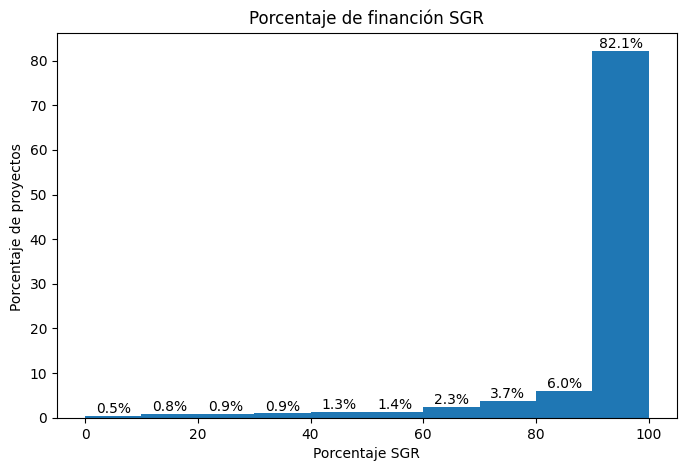

In [47]:
plt.figure(figsize=(8, 5))
counts, edges, bars = plt.hist(gesp_5["por_sgr"]*100,bins = 10,weights= (np.ones(len(gesp_5)) / len(gesp_5))*100 )

plt.bar_label(bars,fmt='%.1f%%')
plt.title("Porcentaje de financión SGR", fontweight="bold")
plt.xlabel("Porcentaje SGR")
plt.ylabel("Porcentaje de proyectos")
plt.show()

El 82.1% de los proyectos tienen una financiación superior a 90%, seguido por un 6% que tienen de 80 a 90 porciento de los proyectos. Esto quiere decir que en su mayoría los proyectos tienen una alta financiación del SGR. 

### 4.2 **Variable que marca si el proyecto es ejecutado por el mismo beneficiario**

Los proyectos de inversión pueden ser ejecutados por los municipios beneficiarios o por otros municipios, departamentos o por privados, por este motivo es interesante conocer si la gestión propia de los proyecto de la población beneficiaria podría afectar los tiempos de retraso que se pueda tener. 

In [48]:
gesp_5['eje_ben'] = np.where(gesp_5["codigo_ejecutor"] == gesp_5["codigo_entidad_territorial_que_aporta_mas_recursos"], "Entidad ejecutora es la misma que la beneficiaria", "Entidad ejecutora es diferente que la beneficiaria")

In [49]:
pie = gesp_5.groupby('eje_ben').agg({'eje_ben':'count'})
pie = pie.rename(columns={"eje_ben": "conteo"})
pie['porcentaje'] = pie['conteo']/sum(pie['conteo'])*100
pie.reset_index(drop = False)


,eje_ben,conteo,porcentaje
0,Entidad ejecutora es diferente que la benefici...,4202,18.078561
1,Entidad ejecutora es la misma que la beneficiaria,19041,81.921439


<Figure size 600x300 with 0 Axes>

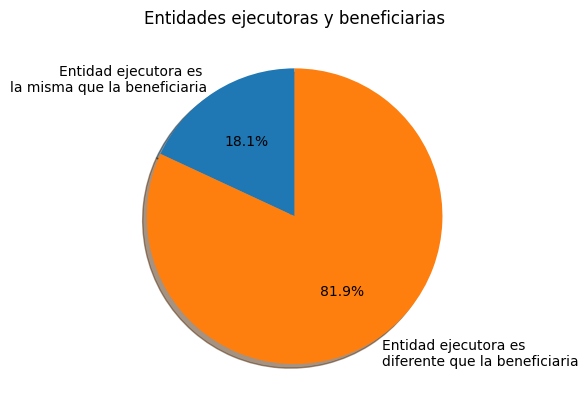

In [50]:
plt.figure(figsize=(6, 3))
plt.subplots()
plt.pie(pie['porcentaje'],labels = ("Entidad ejecutora es \nla misma que la beneficiaria", "Entidad ejecutora es \ndiferente que la beneficiaria"), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Entidades ejecutoras y beneficiarias",fontweight="bold")
plt.show()

En total 4202 (18.1%) proyectos son ejecutados por otra entidad diferente a la beneficiaria, mientras que 19.041 (81.9%) son ejecutados por la misma entidad beneficiaria. 

### 4.3 **Variable que marca si ha tenido algún tipo de denuncia ciudadana o a sido objeto de visitas técnicas por parte del DNP**

Los proyectos de inversión pueden en un proceso de seguimiento pueden ser denunciados por los ciudadanos si estos detectan algún tipo de irregularidad en si gestión, mientras que el DNP realiza visitas técnicas para asegurar que estos proyectos estén cumpliendo con lo establecido en el proyecto y que los tiempos y el presupuesto estén acordes con lo proyectado. 

In [51]:
gesp_5['denuncia'] = np.where((gesp_5["_de_denuncias_ciudadanas_recibidas"]>0) | (gesp_5["no_de_visitas_de_seguimiento"]>0), "Proyecto denunciado", "Proyecto no denunciado")

In [52]:
pie2 = gesp_5.groupby('denuncia').agg({'denuncia':'count'})
pie2 = pie2.rename(columns={"denuncia": "conteo"})
pie2['porcentaje'] = pie2['conteo']/sum(pie2['conteo'])*100
pie2 = pie2.reset_index(drop = False)
pie2

,denuncia,conteo,porcentaje
0,Proyecto denunciado,6045,26.00783
1,Proyecto no denunciado,17198,73.99217


<Figure size 600x300 with 0 Axes>

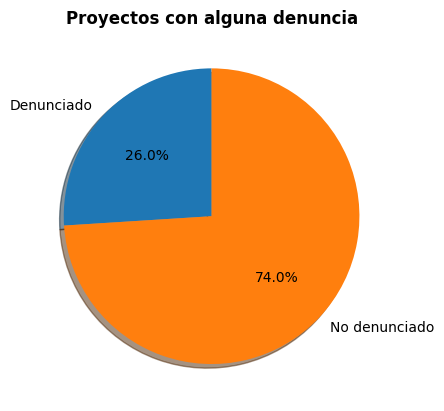

In [102]:
plt.figure(figsize=(6, 3))
plt.subplots()
plt.pie(pie2['porcentaje'],labels = ("Denunciado", "No denunciado"), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proyectos con alguna denuncia", fontweight="bold")

plt.show()

En total 6045 (26.0%) proyectos han tenido algún tipo de denuncia ciudadana o han sido visitados por parte del DNP dado algunos indicios de posibles problemas con la gestión de los mismos. 

### 4.4 **Variable que contiene la cantidad de meses de retraso respecto al plan inicial**

Los proyectos de inversión tienen una planeación inicial en la cual se estipula el mes de entrega de estos, teniendo en cuenta está fecha se realizaran mediones del tiempo de atraso de la finalización de los proyectos de la siguiente manera:



*   Para los proyectos terminados se tomará la fecha de terminación del proyecto respecto a la fecha incialmente estableciada
*   Para los proyectos en ejecución se tendrá en cuenta la fecha actual respecto a la fecha de terminación inicialmente propuesta.
* Los proyectos en contratación se medirán teniendo en cuenta los 30 días que tienen plazo para iniciar su proceso contractual, dado que con ello se estipulará si ya iniciaron el proyecto con algún tipo de demora, esto quiere decir que se le sumarán 30 días a la fecha de aprobación y se comparará con la fecha actual.



In [69]:
#Se crea una función que evaluará cada una de las filas para generar la cantidad de meses estableciados
def dif_meses(row):
  if row['estado_general'] == "TERMINADO" :
    return ((row['fecha_final_ejecutada'] - row['fecha_final_programacion_inicial'] )/np.timedelta64(1, 'M'))
  elif row['estado_general'] == "EN EJECUCIÓN":
    return ((pd.Timestamp.today().normalize() - row['fecha_final_programacion_inicial'] )/np.timedelta64(1, 'M'))
  elif row['estado_general'] == "SIN CONTRATAR":
    return ((pd.Timestamp.today().normalize()  - (row["fecha_aprobacion"]  + np.timedelta64(30,"D")) )/np.timedelta64(1, 'M'))
  

In [70]:
# Se aplica la función para la generación de la variable. 
gesp_5['meses_retraso'] = gesp_5.apply(dif_meses, axis = 1)

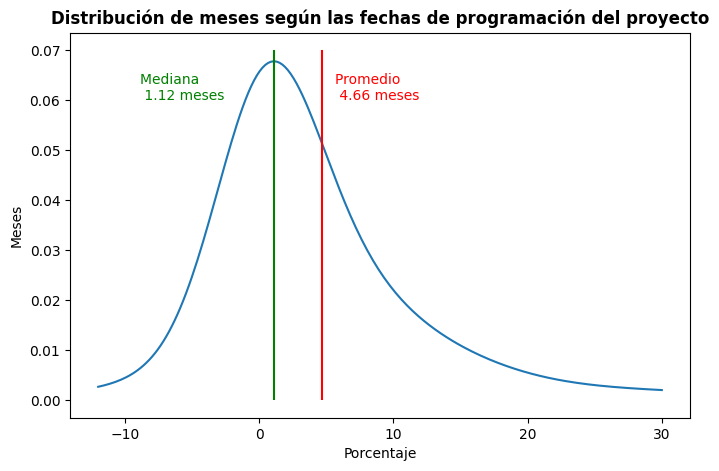

In [101]:
plt.figure(figsize=(8, 5))

density = gaussian_kde(gesp_5['meses_retraso'])


xs = np.linspace(-12,30,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.vlines(gesp_5['meses_retraso'].mean() , ymax = 0.07, ymin = 0 , color ="red")
plt.annotate(f"Promedio \n {gesp_5['meses_retraso'].mean():.2f} meses", xy= (gesp_5['meses_retraso'].mean()+1, 0.06), color = "red" )
plt.vlines(gesp_5['meses_retraso'].median() , ymax = 0.07, ymin = 0 , color ="green")
plt.annotate(f"Mediana \n {gesp_5['meses_retraso'].median():.2f} meses", xy= (gesp_5['meses_retraso'].median()-10, 0.06), color = "green" )


plt.title("Distribución de meses según las fechas de programación del proyecto",fontweight="bold")
plt.xlabel("Porcentaje")
plt.ylabel("Meses")
plt.show()

En promedio los proyectos tienen 4.66 meses de atrasa con una mediana de 1.12 meses de atraso, esta información será analizada a mayor profundidades en los próximos capítulos dado que el tiempo de retraso variará según el estado del proyecto o el tipo de proyecto, pero si es necesario generar una variable que identifique cuales son los proyectos que tienen retraso (más de un mes) y los que no tienen retrasos en su proyecto con retraso (>= 0).


#### 4.4.1 **Variable que identifica si la entidad tiene un proyecto atrasado**



In [103]:
gesp_5['retraso'] = np.where((gesp_5["meses_retraso"]>0) , "Proyecto con retraso", "Proyecto sin retraso")

In [105]:
pie3 = gesp_5.groupby('retraso').agg({'retraso':'count'})
pie3 = pie3.rename(columns={"retraso": "conteo"})
pie3['porcentaje'] = pie3['conteo']/sum(pie3['conteo'])*100
pie3 = pie3.reset_index(drop = False)
pie3

,retraso,conteo,porcentaje
0,Proyecto con retraso,14042,60.413888
1,Proyecto sin retraso,9201,39.586112


<Figure size 600x300 with 0 Axes>

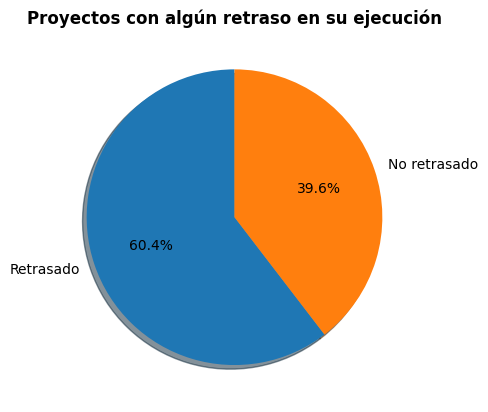

In [108]:
plt.figure(figsize=(6, 3))
plt.subplots()
plt.pie(pie3['porcentaje'],labels = ("Retrasado", "No retrasado"), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proyectos con algún retraso en su ejecución", fontweight="bold")

plt.show()

En total 14.042 proyectos se encuentran con algún tipo de retraso siendo el 60.4% de los proyectos financiados con el SGR.

## 5. Genere nuevos DataFrames agrupando datos según características de interés, tango usando .groupby() como filtros. Una dos de los DataFrames generados por filtro y agrupamiento, inteprete cuidadosamente los datos obtenidos.

## 6. Graficar variables numéricas matizando según variables categóricas (hue).

## 7. Construir tablas pivote y hacer gráficas de calor de las mismas.

## 8. Hacer al menos dos gráficas con datos categóricos.

## 9. Graficar y analizar la correlación de las variables numéricas del DataSet.

## 10. Use *expresiones regulares* ( $\hat{ }$ , .* , \$ , etc. ) para filtrar dependiendo contenidos de texto y grafique los resultados obtenidos. 